In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv('hyderabad_home_price.csv')
df1.head()

,Unnamed: 0,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,Super built-up Area,19-Dec,Nizampet,2 BHK,Coomee,1056,2.0,1.0,39.07
1,1,Plot Area,Ready To Move,Hitech City,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,3,Super built-up Area,Ready To Move,Alwal,3 BHK,Soiewre,1521,3.0,1.0,95.00
3,5,Super built-up Area,Ready To Move,Nizampet,2 BHK,DuenaTa,1170,2.0,1.0,38.00
4,11,Plot Area,Ready To Move,Hyder Nagar,4 Bedroom,Prrry M,2785,5.0,3.0,295.00


In [3]:
df1.tail()

,Unnamed: 0,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1394,2502,Super built-up Area,Ready To Move,Nacharam,4 BHK,Prionad,2524,5.0,2.0,190.00
1395,2507,Super built-up Area,Ready To Move,Habsiguda,2 BHK,Vaniai,1045,2.0,2.0,76.77
1396,2508,Super built-up Area,Ready To Move,Habsiguda,3 BHK,SPavenc,1290,2.0,3.0,45.15
1397,2509,Super built-up Area,Ready To Move,Nacharam,2 BHK,SMaxyay,1400,2.0,1.0,78.00
1398,2513,Super built-up Area,Ready To Move,Nacharam,3 BHK,Mades G,1680,3.0,1.0,112.00


In [4]:
df1.shape

(1399, 10)

In [5]:
df1.columns

Index(['Unnamed: 0', 'area_type', 'availability', 'location', 'size',
       'society', 'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df1['area_type'].value_counts()

Super built-up  Area    1124
Built-up  Area           218
Plot  Area                47
Carpet  Area              10
Name: area_type, dtype: int64

In [8]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(1399, 6)

In [9]:
df2.isnull().sum()

Unnamed: 0    0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2.shape

(1399, 6)

In [11]:
df2.drop(['Unnamed: 0'], axis='columns', inplace = True)

In [12]:
df2.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [13]:
df2.shape

(1399, 5)

In [14]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.bhk.unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6], dtype=int64)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
17,Kokapet,4 BHK,2100 - 2850,4.0,186.000,4
66,Nizampet,4 BHK,3067 - 8156,4.0,477.000,4
76,Manikonda,2 BHK,1042 - 1105,2.0,54.005,2
92,Gachibowli,2 BHK,1145 - 1340,2.0,43.490,2
109,Narsingi,2 BHK,1015 - 1540,2.0,56.800,2
331,Kukatpally,2 BHK,1195 - 1440,2.0,63.770,2
390,West Marredpally,2 BHK,1120 - 1145,2.0,48.130,2
396,Alwal,4 Bedroom,3090 - 5002,4.0,445.000,4
453,Mallapur,2 BHK,1160 - 1195,2.0,59.935,2
501,Miyapur,2 BHK,1115 - 1130,2.0,58.935,2


In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head(2)

,location,size,total_sqft,bath,price,bhk
0,Nizampet,2 BHK,1056.0,2.0,39.07,2
1,Hitech City,4 Bedroom,2600.0,5.0,120.00,4


In [19]:
df3.loc[30]

location      Mallampet
size              3 BHK
total_sqft       2010.0
bath                3.0
price              91.0
bhk                   3
Name: 30, dtype: object

In [20]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Nizampet,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Hitech City,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Alwal,3 BHK,1521.0,3.0,95.00,3,6245.890861
3,Nizampet,2 BHK,1170.0,2.0,38.00,2,3247.863248
4,Hyder Nagar,4 Bedroom,2785.0,5.0,295.00,4,10592.459605


In [21]:
df4_stats = df4['price_per_sqft'].describe()
df4_stats

count      1396.000000
mean       6299.128719
std       18005.615568
min         371.428571
25%        4328.879936
50%        5333.979955
75%        6711.409396
max      672727.272727
Name: price_per_sqft, dtype: float64

In [22]:
df4.to_csv("hhp.csv",index=False)

In [23]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

Kukatpally           96
Kondapur             82
Manikonda            65
Nizampet             61
Hitech City          51
                     ..
Abids                 1
Bollaram              1
Qutub Shahi Tombs     1
New Maruthi Nagar     1
Aushapur              1
Name: location, Length: 180, dtype: int64

In [24]:
location_stats.values.sum()

1396

In [25]:
len(location_stats[location_stats>10])

38

In [26]:
len(location_stats)

180

In [27]:
len(location_stats[location_stats<=10])

142

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

TellapurOsman Nagar Road    10
Mallapur                     9
Tarnaka                      8
Adibatla                     8
Mehdipatnam                  8
                            ..
Abids                        1
Bollaram                     1
Qutub Shahi Tombs            1
New Maruthi Nagar            1
Aushapur                     1
Name: location, Length: 142, dtype: int64

In [29]:
len(df4.location.unique())

180

In [30]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

39

In [31]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Nizampet,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Hitech City,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Alwal,3 BHK,1521.0,3.0,95.00,3,6245.890861
3,Nizampet,2 BHK,1170.0,2.0,38.00,2,3247.863248
4,other,4 Bedroom,2785.0,5.0,295.00,4,10592.459605
5,other,2 BHK,1000.0,2.0,38.00,2,3800.000000
6,Narsingi,3 Bedroom,2250.0,3.0,148.00,3,6577.777778
7,other,2 BHK,1175.0,2.0,73.50,2,6255.319149
8,Kukatpally,3 BHK,1180.0,3.0,48.00,3,4067.796610
9,Madhapur,3 BHK,1540.0,3.0,60.00,3,3896.103896


In [32]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
210,Malkajgiri,3 Bedroom,11.0,3.0,74.0,3,672727.272727
295,Banjara Hills,4 BHK,1150.0,4.0,260.0,4,22608.695652
296,Beeramguda,5 Bedroom,1200.0,5.0,190.0,5,15833.333333
718,other,2 BHK,550.0,1.0,16.0,2,2909.090909
1153,Kondapur,2 BHK,550.0,1.0,15.0,2,2727.272727


In [33]:
df4.shape

(1396, 7)

In [34]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(1389, 7)

In [35]:
df5.price_per_sqft.describe()

count     1389.000000
mean      5805.680915
std       2310.912463
min        371.428571
25%       4330.979700
50%       5333.333333
75%       6685.950413
max      22648.877319
Name: price_per_sqft, dtype: float64

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(1072, 7)

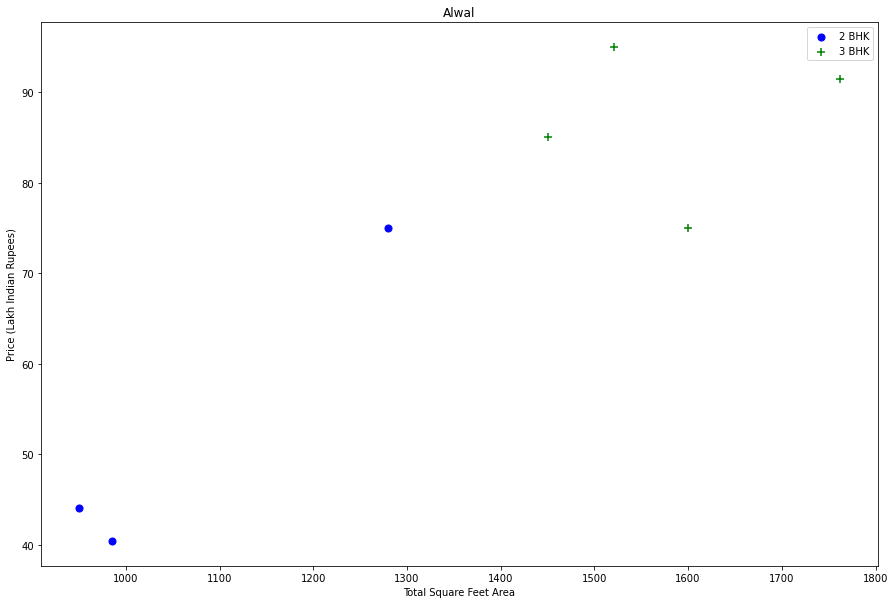

In [37]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Alwal")

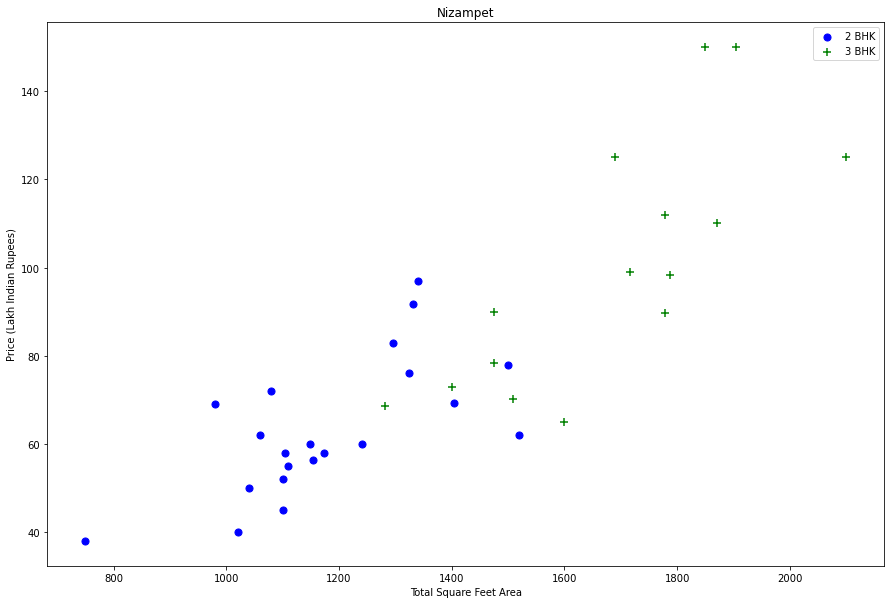

In [38]:
plot_scatter_chart(df6,"Nizampet")

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(786, 7)

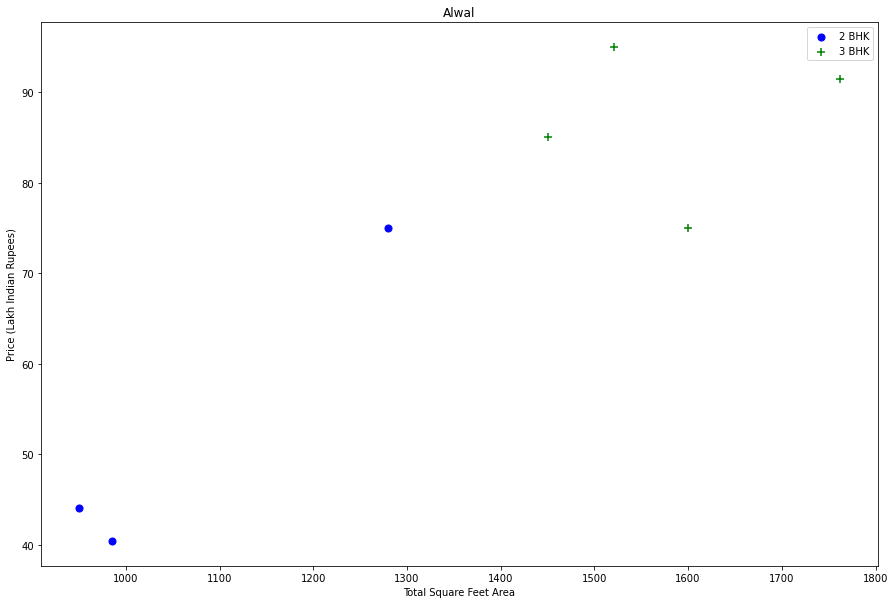

In [40]:
plot_scatter_chart(df7,"Alwal")

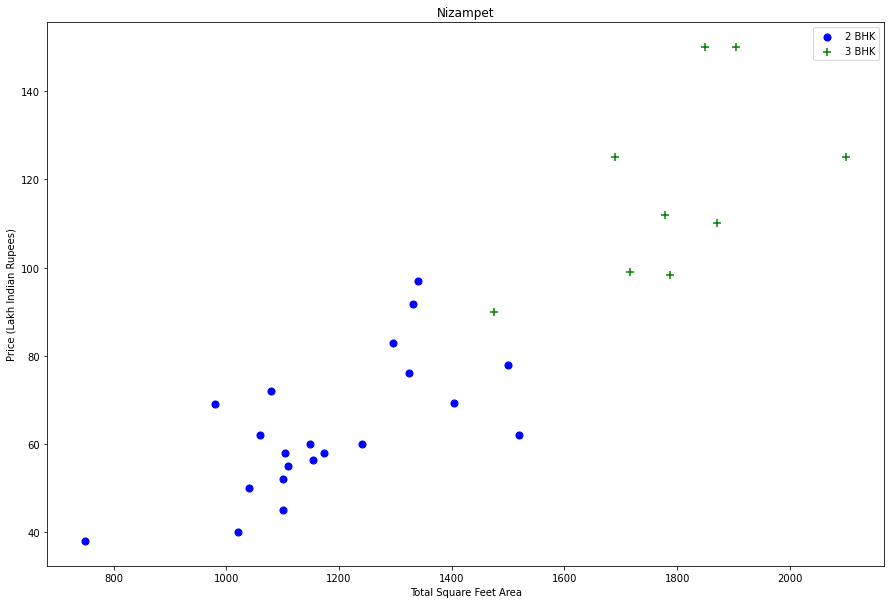

In [41]:
plot_scatter_chart(df7,"Nizampet")

Text(0, 0.5, 'Count')

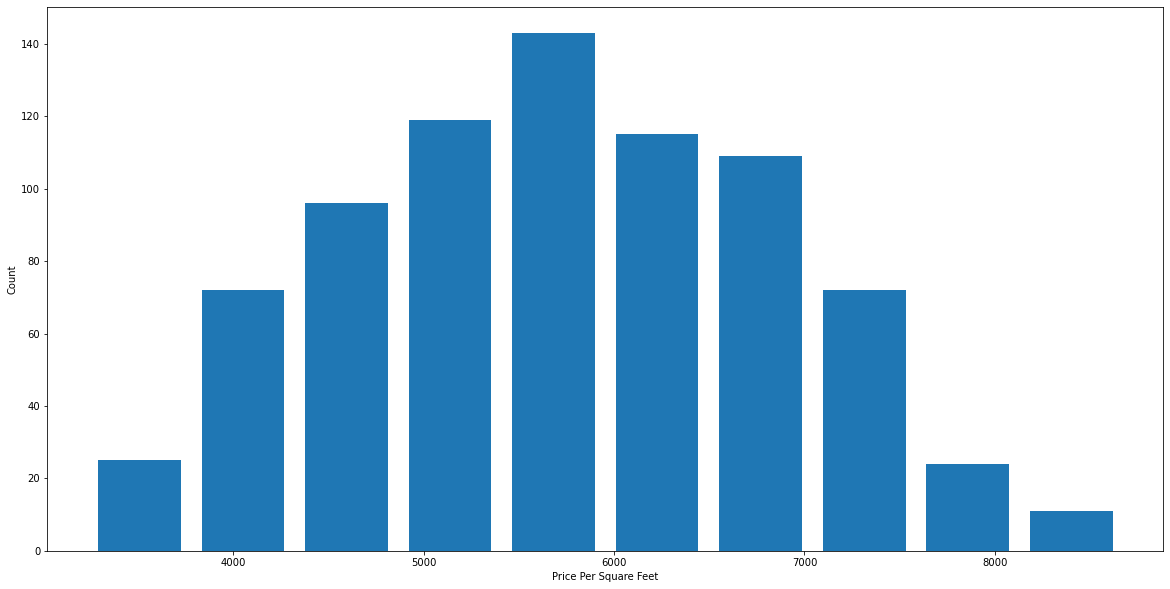

In [42]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [43]:
df7.bath.unique()

array([3., 2., 1., 4., 5., 6., 9., 7.])

Text(0, 0.5, 'Count')

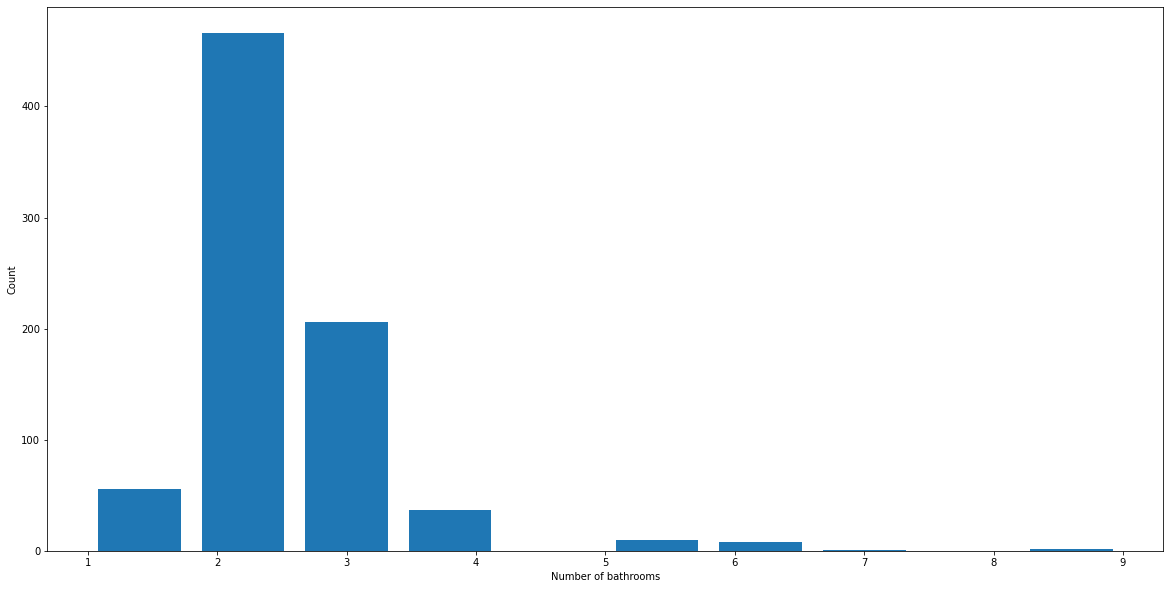

In [44]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [45]:
df7[df7.bath>5]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
273,Kokapet,4 BHK,3467.86,6.0,249.0,4,7180.220655
485,Malkajgiri,11 BHK,5000.00,9.0,360.0,11,7200.000000
587,Miyapur,4 BHK,4850.00,6.0,385.0,4,7938.144330
628,Nanakramguda,4 BHK,3630.00,6.0,195.0,4,5371.900826
743,Puppalaguda,4 Bedroom,3750.00,6.0,290.0,4,7733.333333
794,Tellapur,4 BHK,3430.00,6.0,228.5,4,6661.807580
848,other,5 BHK,4500.00,7.0,337.0,5,7488.888889
856,other,9 BHK,5000.00,9.0,210.0,9,4200.000000
964,other,4 BHK,3715.00,6.0,224.5,4,6043.068641
989,other,4 Bedroom,3500.00,6.0,225.0,4,6428.571429


In [46]:
df7[df7.bath>df7.bhk+1]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
106,Beeramguda,3 BHK,1499.00,5.0,102.0,3,6804.536358
273,Kokapet,4 BHK,3467.86,6.0,249.0,4,7180.220655
406,Kukatpally,3 BHK,3450.00,5.0,260.0,3,7536.231884
587,Miyapur,4 BHK,4850.00,6.0,385.0,4,7938.144330
628,Nanakramguda,4 BHK,3630.00,6.0,195.0,4,5371.900826
743,Puppalaguda,4 Bedroom,3750.00,6.0,290.0,4,7733.333333
794,Tellapur,4 BHK,3430.00,6.0,228.5,4,6661.807580
848,other,5 BHK,4500.00,7.0,337.0,5,7488.888889
964,other,4 BHK,3715.00,6.0,224.5,4,6043.068641
989,other,4 Bedroom,3500.00,6.0,225.0,4,6428.571429


In [47]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(775, 7)

In [48]:
df8.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Alwal,3 BHK,1521.0,3.0,95.0,3,6245.890861
1,Alwal,3 BHK,1600.0,2.0,75.0,3,4687.500000


In [49]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(3)

,location,total_sqft,bath,price,bhk
0,Alwal,1521.0,3.0,95.00,3
1,Alwal,1600.0,2.0,75.00,3
2,Alwal,1762.0,3.0,91.45,3


In [50]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,Alwal,Aminpur,Appa Junction,Appa Junction Peerancheru,Bachupally,Bachupally Road,Balanagar,Banjara Hills,Beeramguda,Begumpet,...,Narsingi,Nizampet,Patancheru,Pragathi Nagar Kukatpally,Puppalaguda,Sanath Nagar,Serilingampally,Tellapur,West Marredpally,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,Alwal,Aminpur,Appa Junction,Appa Junction Peerancheru,Bachupally,...,Nanakramguda,Narsingi,Nizampet,Patancheru,Pragathi Nagar Kukatpally,Puppalaguda,Sanath Nagar,Serilingampally,Tellapur,West Marredpally
0,Alwal,1521.0,3.0,95.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alwal,1600.0,2.0,75.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alwal,1762.0,3.0,91.45,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alwal,1280.0,2.0,75.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alwal,1450.0,2.0,85.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,Alwal,Aminpur,Appa Junction,Appa Junction Peerancheru,Bachupally,Bachupally Road,...,Nanakramguda,Narsingi,Nizampet,Patancheru,Pragathi Nagar Kukatpally,Puppalaguda,Sanath Nagar,Serilingampally,Tellapur,West Marredpally
0,1521.0,3.0,95.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1600.0,2.0,75.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df11.shape

(775, 42)

In [54]:
X = df11.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,Alwal,Aminpur,Appa Junction,Appa Junction Peerancheru,Bachupally,Bachupally Road,Balanagar,...,Nanakramguda,Narsingi,Nizampet,Patancheru,Pragathi Nagar Kukatpally,Puppalaguda,Sanath Nagar,Serilingampally,Tellapur,West Marredpally
0,1521.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1600.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1762.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X.shape

(775, 41)

In [56]:
y = df11.price
y.head(3)

0    95.00
1    75.00
2    91.45
Name: price, dtype: float64

In [57]:
len(y)

775

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [59]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9265536704680297

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87523952, 0.89448311, 0.91202594, 0.8977137 , 0.9415863 ])

In [61]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.904210,{'normalize': False}
1,lasso,0.900020,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.823147,"{'criterion': 'mse', 'splitter': 'best'}"


In [62]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [63]:
predict_price('Alwal',1000, 2, 2)

46.37554460740992

In [64]:
predict_price('Nizampet',1000, 2, 2)

55.861339631338964

In [65]:
predict_price('Hitech City',1000, 2, 2)

53.64366499608923

In [66]:
predict_price('Hitech City',1000, 3, 3)

50.798075473111595

In [67]:
import pickle
with open('hyderabad_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [68]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))